In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
gm_data = pd.read_csv('untidy-data/gapminder2.csv')

In [4]:
gm_data.head()

,country,life_expect_1955,life_expect_1960,life_expect_1965,life_expect_1970,life_expect_1975,life_expect_1980,life_expect_1985,life_expect_1990,life_expect_1995,...,pop_1960,pop_1965,pop_1970,pop_1975,pop_1980,pop_1985,pop_1990,pop_1995,pop_2000,pop_2005
0,Afghanistan,30.332,31.997,34.020,36.088,38.438,39.854,40.822,41.674,41.763,...,9829450,10997885,12430623,14132019,15112149,13796928,14669339,20881480,23898198,29928987
1,Argentina,64.399,65.142,65.634,67.065,68.481,69.942,70.774,71.868,73.275,...,20616009,22283100,23962313,26081880,28369799,30675059,33022202,35311049,37497728,39537943
2,Aruba,64.381,66.606,68.336,70.941,71.830,74.116,74.494,74.108,73.011,...,57203,59020,59039,59390,60266,64129,66653,67836,69539,71566
3,Australia,70.330,70.930,71.100,71.930,73.490,74.740,76.320,77.560,78.830,...,10361273,11439384,12660160,13771400,14615900,15788300,17022133,18116171,19164620,20090437
4,Austria,67.480,69.540,70.140,70.630,72.170,73.180,74.940,76.040,77.510,...,7047437,7270889,7467086,7578903,7549433,7559776,7722953,8047433,8113413,8184691


In [5]:
gm_data.columns
# separate columns for life expectancy and population every 5 years from 1955 to 2005

Index(['country', 'life_expect_1955', 'life_expect_1960', 'life_expect_1965',
       'life_expect_1970', 'life_expect_1975', 'life_expect_1980',
       'life_expect_1985', 'life_expect_1990', 'life_expect_1995',
       'life_expect_2000', 'life_expect_2005', 'pop_1955', 'pop_1960',
       'pop_1965', 'pop_1970', 'pop_1975', 'pop_1980', 'pop_1985', 'pop_1990',
       'pop_1995', 'pop_2000', 'pop_2005'],
      dtype='object')

In [6]:
gm_data.shape

(63, 23)

In [7]:
# create list of columns to include in each df >> add to value_vars variable
life_cols = ['life_expect_1955', 'life_expect_1960', 'life_expect_1965',
       'life_expect_1970', 'life_expect_1975', 'life_expect_1980',
       'life_expect_1985', 'life_expect_1990', 'life_expect_1995',
       'life_expect_2000', 'life_expect_2005']
pop_cols = ['pop_1955', 'pop_1960',
       'pop_1965', 'pop_1970', 'pop_1975', 'pop_1980', 'pop_1985', 'pop_1990',
       'pop_1995', 'pop_2000', 'pop_2005']

In [8]:
# turn wide to long
gm_lifeex = gm_data.melt(id_vars=['country'], value_vars=life_cols,
                       var_name='year', value_name='life_expectancy')
gm_lifeex.head()

,country,year,life_expectancy
0,Afghanistan,life_expect_1955,30.332
1,Argentina,life_expect_1955,64.399
2,Aruba,life_expect_1955,64.381
3,Australia,life_expect_1955,70.330
4,Austria,life_expect_1955,67.480


In [9]:
# this df only has life expectancy columns
gm_lifeex.year.value_counts()

life_expect_1995    63
life_expect_1970    63
life_expect_1955    63
life_expect_2005    63
life_expect_1975    63
life_expect_1960    63
life_expect_1980    63
life_expect_2000    63
life_expect_1985    63
life_expect_1990    63
life_expect_1965    63
Name: year, dtype: int64

In [10]:
# year column only has the year
gm_lifeex.year = gm_lifeex.year.str.replace('life_expect_', '')
gm_lifeex.head()

,country,year,life_expectancy
0,Afghanistan,1955,30.332
1,Argentina,1955,64.399
2,Aruba,1955,64.381
3,Australia,1955,70.330
4,Austria,1955,67.480


In [11]:
# melted life ex df shape
gm_lifeex.shape

(693, 3)

In [12]:
# create another df for the population by year and country
gm_pop = gm_data.melt(id_vars=['country'], value_vars=pop_cols,
                       var_name='year', value_name='population')
gm_pop.head()

,country,year,population
0,Afghanistan,pop_1955,8891209
1,Argentina,pop_1955,18927821
2,Aruba,pop_1955,53865
3,Australia,pop_1955,9277087
4,Austria,pop_1955,6946885


In [13]:
# clean the year column to only show the year 
gm_pop.year = gm_pop.year.str.replace('pop_', '')
gm_pop.head()

,country,year,population
0,Afghanistan,1955,8891209
1,Argentina,1955,18927821
2,Aruba,1955,53865
3,Australia,1955,9277087
4,Austria,1955,6946885


In [14]:
# join 2 dfs into one df
tidy_gm = gm_lifeex.merge(gm_pop, how = 'inner', on =['country', 'year'])

In [15]:
tidy_gm.head()

,country,year,life_expectancy,population
0,Afghanistan,1955,30.332,8891209
1,Argentina,1955,64.399,18927821
2,Aruba,1955,64.381,53865
3,Australia,1955,70.330,9277087
4,Austria,1955,67.480,6946885


In [16]:
#check correlation between poopulation and life expectancy
tidy_gm.corr()

,life_expectancy,population
life_expectancy,1.000000,-0.060939
population,-0.060939,1.000000


- negative weak correlation (6%) between poopulation and life expectancy. As one population increases, llife expectancy decreases.

In [115]:
# countries with their lowest life expectancy
tidy_gm.groupby(['country']).life_expectancy.min().sort_values(ascending=False)

country
Iceland           73.470
Norway            73.440
Netherlands       72.990
Switzerland       70.560
United Kingdom    70.420
                   ...  
Indonesia         39.918
Bangladesh        39.348
Nigeria           37.802
Afghanistan       30.332
Rwanda            23.599
Name: life_expectancy, Length: 63, dtype: float64

In [179]:
# life expectancy stats
tidy_gm.life_expectancy.describe()

count    693.000000
mean      66.146406
std       10.714033
min       23.599000
25%       59.957000
50%       69.498000
75%       73.840000
max       82.603000
Name: life_expectancy, dtype: float64

In [181]:
# country with the lowest life expectancy
tidy_gm[tidy_gm.life_expectancy == tidy_gm.life_expectancy.min()]

,country,year,life_expectancy,population
494,Rwanda,1990,23.599,6923738


In [180]:
# country with the highest life expectancy
tidy_gm[tidy_gm.life_expectancy == tidy_gm.life_expectancy.max()]

,country,year,life_expectancy,population
669,Japan,2005,82.603,127417244


In [25]:
# for each country, mean life expectancy 
avg_life = tidy_gm.groupby(['country']).life_expectancy.mean().reset_index()
avg_life

,country,life_expectancy
0,Afghanistan,38.267727
1,Argentina,69.658182
2,Aruba,71.410273
3,Australia,75.166818
4,Austria,73.676273
...,...,...
58,Switzerland,76.105545
59,Turkey,61.161091
60,United Kingdom,74.353727
61,United States,73.936545


In [32]:
# population max by country 
max_pop = tidy_gm.groupby(['country']).population.max().reset_index()
max_pop

,country,population
0,Afghanistan,29928987
1,Argentina,39537943
2,Aruba,71566
3,Australia,20090437
4,Austria,8184691
...,...,...
58,Switzerland,7489370
59,Turkey,69660559
60,United Kingdom,60441457
61,United States,295734134


Text(0, 0.5, 'Life expectancy')

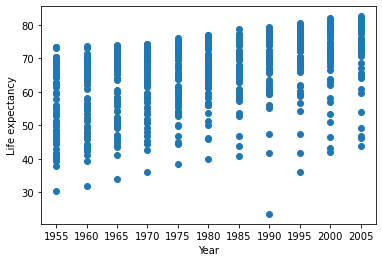

In [34]:
fig = plt.figure()
plt.scatter(tidy_gm.year, tidy_gm.life_expectancy)
plt.xlabel('Year')
plt.ylabel('Life expectancy')
# 1990 has an outlier

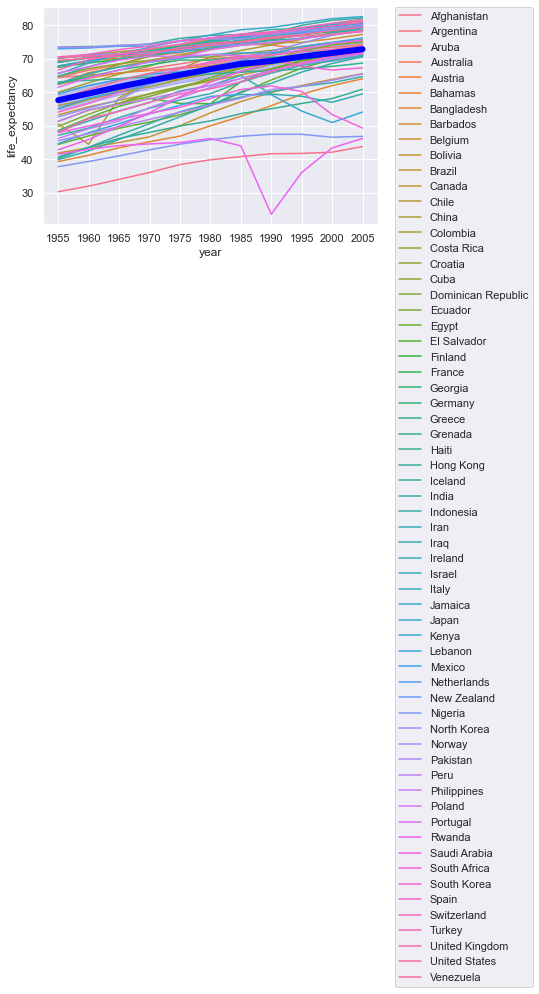

In [63]:
# visualiza life expectancy over the years
sns.set(style="darkgrid")
sns.lineplot(y='life_expectancy', x='year', data=tidy_gm, hue ='country', legend='full', alpha = 1)

# plot a mean line
sns.lineplot(data = tidy_gm, x = 'year', y = 'life_expectancy', color = 'blue', estimator = 'mean', alpha = 1,linewidth = 6)

# move legend outside
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


- overall upward trend: life expectancy has increased oover the years 
- huge dip in 1990 is the outlier in Rwanda

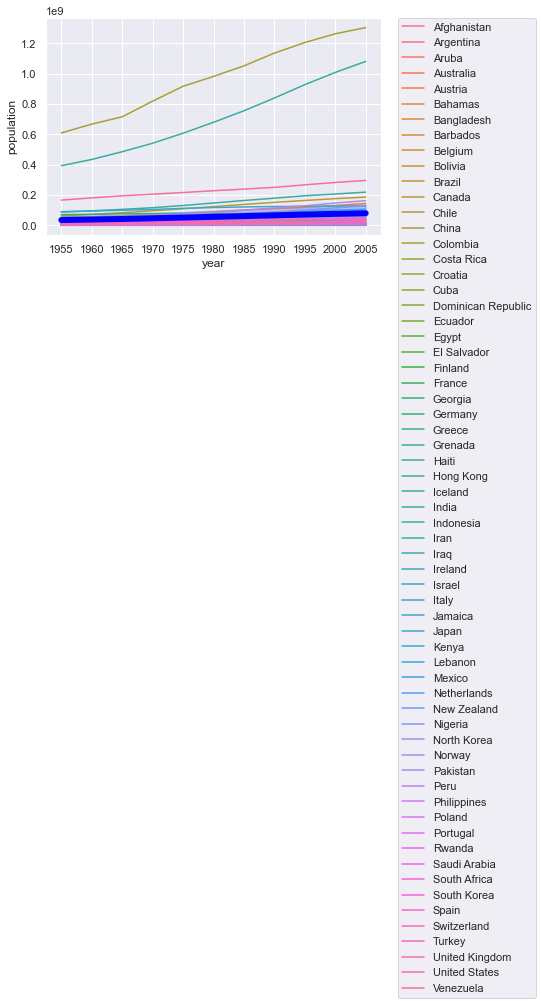

In [67]:
sns.set(style="darkgrid")
sns.lineplot(y='population', x='year', data=tidy_gm, hue ='country', legend='full', alpha = 1)

# plot a mean line
sns.lineplot(data = tidy_gm, y = 'population', x = 'year', color = 'blue', estimator = 'mean', alpha = 1,linewidth = 6)

# move legend outside
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
